# Logistic Regression Project (Predict Ad click)

In [1]:
# importing necessery library

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading dataset

df= pd.read_csv(r"D:\kiggle file\project\advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# Exploratory data analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

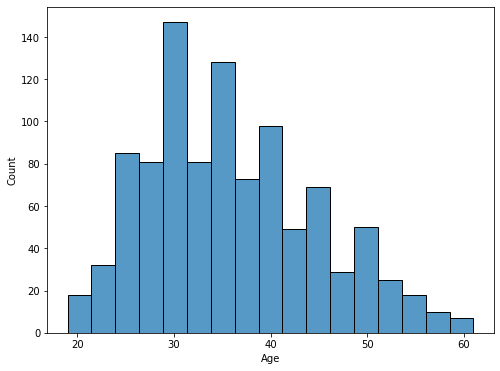

In [4]:
# age hist plot

plt.figure(figsize=(8,6))
sns.histplot(df.Age)

<Figure size 720x576 with 0 Axes>

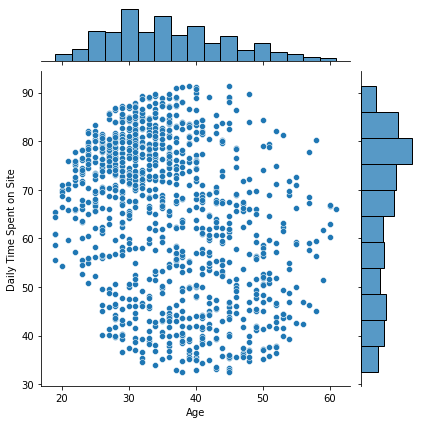

In [5]:
# jointplot for Age and Daily Time Spent on Site

plt.figure(figsize=(10,8))
sns.jointplot(x= df.Age, y=df["Daily Time Spent on Site"])

<Figure size 720x576 with 0 Axes>

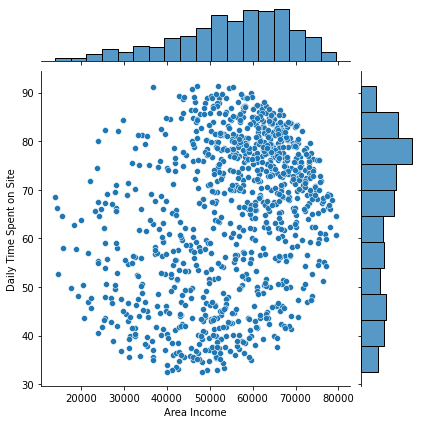

In [6]:
# jointplot between "Area income" and " Daily Time Spent on Site"

plt.figure(figsize=(10,8))
sns.jointplot(x=df["Area Income"],y=df["Daily Time Spent on Site"])

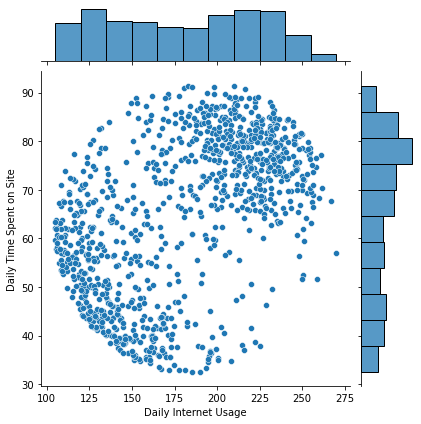

In [7]:
# jointplot between "Daily Internet Usage" and " Daily Time Spent on Site"

sns.jointplot(x=df["Daily Internet Usage"],y=df["Daily Time Spent on Site"])

<AxesSubplot:>

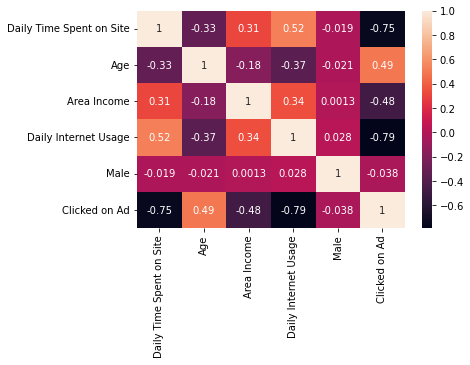

In [8]:
# Heatmap

sns.heatmap(df.corr(),annot=True)

# step-1; column_transformer
# we will use make_column_transfrom for -- "replacing missing values, scaling numerical values, and one hot encoding categorical data"
"""
- SimpleImputer - class can be used to replace missing values, 
- MinMaxScaler - class can be used to scale numerical values, 
- OneHotEncoder - can be used to encode categorical variables
- StandardScaler - StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. 
                 Unit variance means dividing all the values by the standard deviation.

"""
"""
- ex- for 1 class
{

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

from sklearn.compose import make_column_transformer

#prepare transform

scaler = MinMaxScaler()

#fit transform on training data

scaler.fit(train_X)

#transform training data

train_X = scaler.transform(train_X)

}

- ex- for multiple class
{

num_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']


ct = make_column_transformer(
    (MinMaxScaler(), num_columns),
    (StandardScaler(), num_columns),
    remainder='passthrough')

X_train = ct.fit_transform(X_train)

X_test = ct.transform(X_test)

}
"""

- ex- for selected column

"""

#in the example we will scale selcted column data from dataset

#import model 

from sklearn.preprocessing import StandardScaler

#calling classifier

s_sc = StandardScaler()

#selecting column from dataset

col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#fit and transfrom by selected column and updated this data to main datafram

dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

"""

In [9]:
# Scaling and standarized numarical variable

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

X = df.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line', 'Country', 'City'],axis=1)
y = df["Clicked on Ad"]

# spliting dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)

# numaric column
num_col= X.columns

# column transformer
ct = make_column_transformer(
      (MinMaxScaler(),num_col),
    (StandardScaler(),num_col),
    remainder="passthrough")

X_train= ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# step-2: Model Building 
""" model building for 
accuracy_score,counfusion_matrix,classification_report"""

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# make function for model
def print_score(clf,X_train,y_train,X_test,y_test, train=True):
    
    # when train=true ,it's for training dataset
    
    if train:
        pred =  clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print("==== Train Result ==== \n ")
        print(f"Accuracy Score: {accuracy_score(y_train,pred)*100:.2f}%")
        print("\n")
        print(f"Classification Report: \n{clf_report}")
        print("\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train,pred)}\n\n")
    
    # when train=false , it's for testing dataset
    elif train == False:
        pred =  clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print("==== Test Result ==== \n ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print("\n")
        print(f"Classification Report: \n{clf_report}")
        print("\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test,pred)}\n")
        

# Note for Logistic regression
"""
- Binary Output Variable: This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- Remove Noise: Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- Gaussian Distribution: Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- Remove Correlated Inputs: Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- Fail to Converge: It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).
"""

# implimenting logistic regression in scikit learn


In [12]:
from sklearn.linear_model import LogisticRegression

# calling model
lr_clf = LogisticRegression(solver="liblinear")

#trainiing the model
lr_clf.fit(X_train,y_train)

# calling performance model for trainging and testing dataset
print_score(lr_clf,X_train,y_train,X_test,y_test, train = True)
#for testing dataset
print_score(lr_clf,X_train,y_train,X_test,y_test, train = False)

==== Train Result ==== 
 
Accuracy Score: 97.43%


Classification Report: 
                    0           1  accuracy   macro avg  weighted avg
precision    0.964088    0.985207  0.974286    0.974648      0.974527
recall       0.985876    0.962428  0.974286    0.974152      0.974286
f1-score     0.974860    0.973684  0.974286    0.974272      0.974279
support    354.000000  346.000000  0.974286  700.000000    700.000000


Confusion Matrix: 
 [[349   5]
 [ 13 333]]


==== Test Result ==== 
 
Accuracy Score: 97.00%


Classification Report: 
                    0           1  accuracy   macro avg  weighted avg
precision    0.959732    0.980132      0.97    0.969932      0.970204
recall       0.979452    0.961039      0.97    0.970246      0.970000
f1-score     0.969492    0.970492      0.97    0.969992      0.970005
support    146.000000  154.000000      0.97  300.000000    300.000000


Confusion Matrix: 
 [[143   3]
 [  6 148]]



#  Performance Measurement
 in confusion matrix
- Each row: actual class
- Each column: predicted class
- 1st row and 1st column is negative
- 2nd row and 2nd column is positive 

First row: Non-clicked Ads, the negative class:

- 143 were correctly classified as Non-clicked Ads. True negatives.
- Remaining 6 were wrongly classified as clicked Ads. False positive

Second row: The clicked Ads, the positive class:

- 3 were incorrectly classified as Non-clicked Ads. False negatives
- 146 were correctly classified clicked Ads. True positives

# making dataframe for training and testing prediction accuracy%

In [13]:
pred_test = lr_clf.predict(X_test)
pred_train = lr_clf.predict(X_train)

test_score = accuracy_score(y_test,pred_test)*100
train_score = accuracy_score(y_train,pred_train)*100

dataframe = pd.DataFrame(data=[["Logistic Regression",train_score,test_score]],
                         columns=["model","Training accuracy %","testing accuracy %"])
dataframe

,model,Training accuracy %,testing accuracy %
0,Logistic Regression,97.428571,97.0


# 2. K-nearest neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

#addressing model
knn_clf = KNeighborsClassifier()
#training model
knn_clf.fit(X_train,y_train)

# calling the build model from above

print_score(knn_clf,X_train,y_train,X_test,y_test,train=True)
print_score(knn_clf,X_train,y_train,X_test,y_test,train=False)

==== Train Result ==== 
 
Accuracy Score: 97.29%


Classification Report: 
                    0           1  accuracy   macro avg  weighted avg
precision    0.949062    1.000000  0.972857    0.974531      0.974240
recall       1.000000    0.945087  0.972857    0.972543      0.972857
f1-score     0.973865    0.971768  0.972857    0.972817      0.972829
support    354.000000  346.000000  0.972857  700.000000    700.000000


Confusion Matrix: 
 [[354   0]
 [ 19 327]]


==== Test Result ==== 
 
Accuracy Score: 94.67%


Classification Report: 
                    0           1  accuracy   macro avg  weighted avg
precision    0.922078    0.972603  0.946667    0.947340      0.948014
recall       0.972603    0.922078  0.946667    0.947340      0.946667
f1-score     0.946667    0.946667  0.946667    0.946667      0.946667
support    146.000000  154.000000  0.946667  300.000000    300.000000


Confusion Matrix: 
 [[142   4]
 [ 12 142]]



# making dataframe for logistic and kneighbors accuracy

In [23]:
# for kneighbors accuracy

test_score_k = accuracy_score(y_test,knn_clf.predict(X_test))*100
train_score_k = accuracy_score(y_train,knn_clf.predict(X_train))*100

dataframe_2 = pd.DataFrame(data=[["K-nearest neighbors",train_score_k,test_score_k]],
                         columns=["model","Training accuracy %","testing accuracy %"])

# appended this dataframe to logistic accuracy dataframe
dataframe_x = dataframe.append(dataframe_2,ignore_index=True)
dataframe_x

C:\Users\user\AppData\Local\Temp\ipykernel_11740\3971924681.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe_x = dataframe.append(dataframe_2,ignore_index=True)


,model,Training accuracy %,testing accuracy %
0,Logistic Regression,97.428571,97.000000
1,K-nearest neighbors,97.285714,94.666667


# Logistic Regression Hyperparameter tuning

In [24]:
from sklearn.model_selection import GridSearchCV


lr_clf = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(
    penalty=penalty, 
    C=C, 
    class_weight=class_weight, 
    solver=solver
)

lr_cv = GridSearchCV(
    estimator=lr_clf, 
    param_grid=param_grid, 
    scoring='f1',
    verbose=1, 
    n_jobs=-1, 
    cv=10
)

lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Best parameters: {'C': 0.6, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}
==== Train Result ==== 
 
Accuracy Score: 97.29%


Classification Report: 
                    0           1  accuracy   macro avg  weighted avg
precision    0.961433    0.985163  0.972857    0.973298      0.973162
recall       0.985876    0.959538  0.972857    0.972707      0.972857
f1-score     0.973501    0.972182  0.972857    0.972841      0.972849
support    354.000000  346.000000  0.972857  700.000000    700.000000


Confusion Matrix: 
 [[349   5]
 [ 14 332]]


==== Test Result ==== 
 
Accuracy Score: 97.00%


Classification Report: 
                    0           1  accuracy   macro avg  weighted avg
precision    0.953642    0.986577      0.97    0.970110      0.970549
recall       0.986301    0.954545      0.97    0.970423      0.970000
f1-score     0.969697    0.970297      0.97    0.969997      0.970005
support    146